In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Remove later
import os
os.chdir("C:/Users/Joanne/Documents/Statistics/")

# Read in the Data

In [3]:
df_tic = pd.read_table("2023-08-18-IS-tic.csv",sep=',',header=None)
df_tic.head()

,0,1,2,3,4,5,6,7,8,9,...,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_labels = pd.read_table("2023-08-18-MixDat.csv",sep=',')

#Double check this if correct. Only look at class column
df_labels = df_labels["class"]
df_labels.head()

0    IL
1    IL
2    IL
3    IL
4    IL
Name: class, dtype: object

# Split into train and test groups

In [5]:
from sklearn.model_selection import train_test_split
feat_train, feat_test, resp_train, resp_test = train_test_split(df_tic, df_labels, test_size=0.25)
# print(feat_train.head())

# Scale and Center Columns with Mean and Standard Deviation

In [6]:
# Code from knn_svm_python.ipynb
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# get mean and standard deviation for each column according to train data
scaler.fit(feat_train)
# scale columns of train and test data
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

pd.DataFrame(feat_train).head()

,0,1,2,3,4,5,6,7,8,9,...,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning Models:

# Logistic Regression: 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [8]:
logReg = LogisticRegression(max_iter=1500).fit(feat_train, resp_train)
logReg_yhat = logReg.predict(feat_test)

In [12]:
# print(logReg_yhat)
# print(resp_test)


# Here i made numerical representations for the sake of calculating MSE
logReg_yhat_numRep = []
resp_test_numRep = []

for i in range(len(logReg_yhat)):
    if (logReg_yhat[i] == "IL"):
        logReg_yhat_numRep.append(1)
    elif (logReg_yhat[i] == "SUB"):
        logReg_yhat_numRep.append(0)

for val in resp_test:
    if (val == "IL"):
        resp_test_numRep.append(1)
    elif (val == "SUB"):
        resp_test_numRep.append(0)

# print(logReg_yhat_numRep)
# print(resp_test_numRep)

error = mean_squared_error(logReg_yhat_numRep,resp_test_numRep,squared=False)
print(f"{error} is the MSE of logistic regression")

0.07694153624668539 is the MSE of logistic regression


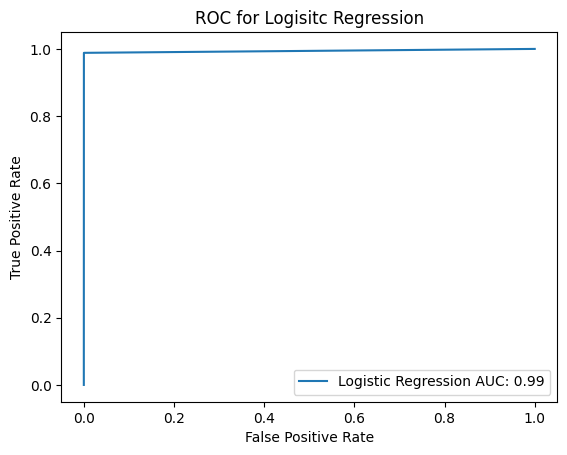

In [16]:
# Code adapted from knn_svm_python.ipynb
# Create an ROC curve for Logistic Regression
from sklearn.metrics import roc_curve, auc

# metrics for logistic regression
fpr_log, tpr_log, _ = roc_curve(resp_test_numRep, logReg_yhat_numRep)
auc_log = auc(fpr_log, tpr_log)

# plot the info
plt.plot(fpr_log, tpr_log, label='Logistic Regression AUC: {0:0.2f}'.format(auc_log))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logisitc Regression')
plt.legend(loc='lower right')